In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.xlsx to data.xlsx


In [10]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('data.xlsx')  # Upload first using the left panel or `files.upload()`


 2. Inspect the dataset and understand its structure

In [11]:
# View basic structure
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData preview:")
print(df.head())

# Check data types and missing values
print("\nInfo:")
df.info()


Shape of dataset: (41263, 11)

Columns:
 ['name', 'online_order', 'book_table', 'Rating', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']

Data preview:
                    name online_order book_table  Rating  votes      location  \
0                  Jalsa          Yes        Yes     4.1    775  Banashankari   
1         Spice Elephant          Yes         No     4.1    787  Banashankari   
2        San Churro Cafe          Yes         No     3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No     3.7     88  Banashankari   
4          Grand Village           No         No     3.8    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4  

 3. Handle missing values appropriately

In [12]:
# Drop rows where essential info is missing
df.dropna(subset=['Rating', 'approx_cost(for two people)', 'cuisines'], inplace=True)

# Fill missing strings (if needed)
df['online_order'] = df['online_order'].fillna('No')
df['book_table'] = df['book_table'].fillna('No')


4. Remove duplicate entries

In [13]:
df.drop_duplicates(inplace=True)

 5. Correct inconsistent data formats (e.g., cuisines, currency, location)

In [14]:
# Strip whitespaces from string fields
df['location'] = df['location'].str.strip().str.title()
df['cuisines'] = df['cuisines'].str.strip()


 6. Standardise key columns like ratings, price, and location

In [15]:
# Standardising rating format (e.g. remove '/5')
df['Rating'] = df['Rating'].astype(str).str.replace('/5', '', regex=False).str.strip()
df = df[df['Rating'].str.lower() != 'new']
df['Rating'] = df['Rating'].replace('–', '')
df = df[df['Rating'] != '']


 7. Convert columns to appropriate data types (e.g., float, int)

In [16]:
# Convert rating to float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Convert votes to int
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)

# Clean cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


 8. Save the cleaned and structured dataset for analysis

In [17]:
df.to_csv('zomato_cleaned.csv', index=False)


9. Group data by cuisine and calculate average ratings, votes, and price range

In [18]:
# Split multiple cuisines into individual rows
df_exploded = df.assign(cuisine=df['cuisines'].str.split(',')).explode('cuisine')
df_exploded['cuisine'] = df_exploded['cuisine'].str.strip()

# Group by cuisine
cuisine_grouped = df_exploded.groupby('cuisine').agg({
    'Rating': 'mean',
    'votes': 'mean',
    'approx_cost(for two people)': 'mean'
}).reset_index()


10. Identify top cuisines based on ratings and popularity (votes)

In [19]:
top_cuisines_by_rating = cuisine_grouped.sort_values(by='Rating', ascending=False).head(10)
top_cuisines_by_votes = cuisine_grouped.sort_values(by='votes', ascending=False).head(10)


11. Highlight best-rated restaurants and link them to their cuisine types

In [20]:
best_rated_restaurants = df_exploded.sort_values(by='Rating', ascending=False).drop_duplicates('cuisine')
best_rated_restaurants = best_rated_restaurants[['name', 'cuisine', 'Rating', 'votes', 'approx_cost(for two people)', 'location']]


 12. Analyse and generate insights into user preferences by cuisine

In [21]:
# Summary view of top cuisines
print("Top cuisines by average rating:\n", top_cuisines_by_rating)
print("\nTop cuisines by average votes:\n", top_cuisines_by_votes)

# Example: preference for affordable, high-rated food
affordable_high_rated = cuisine_grouped[(cuisine_grouped['Rating'] >= 4.0) &
                                        (cuisine_grouped['approx_cost(for two people)'] < 500)]
print("\nAffordable yet high-rated cuisines:\n", affordable_high_rated)


Top cuisines by average rating:
            cuisine    Rating        votes  approx_cost(for two people)
24       Cantonese  4.600000  2353.666667                  2800.000000
2          African  4.523529   651.941176                  1047.058824
88     Singaporean  4.414894  1206.382979                  1268.085106
13         Belgian  4.366667   676.666667                   500.000000
59       Malaysian  4.315094  1301.179245                  1379.716981
65   Modern Indian  4.307692  1043.433566                  1488.811189
92      Sri Lankan  4.306667  3021.200000                  1240.000000
102          Vegan  4.300000   191.333333                   700.000000
49          Jewish  4.300000   191.333333                   700.000000
36          German  4.285714  2034.000000                  1585.714286

Top cuisines by average votes:
           cuisine    Rating        votes  approx_cost(for two people)
92     Sri Lankan  4.306667  3021.200000                  1240.000000
83        Rus

13. Visualise key findings using Matplotlib

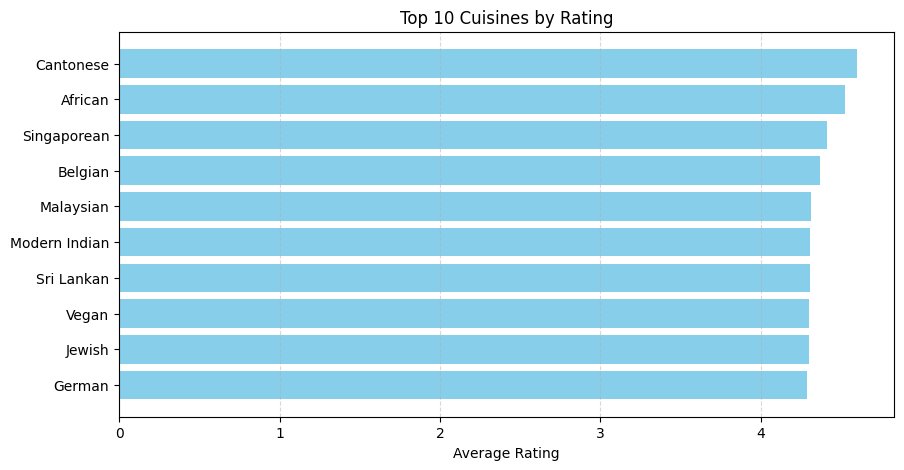

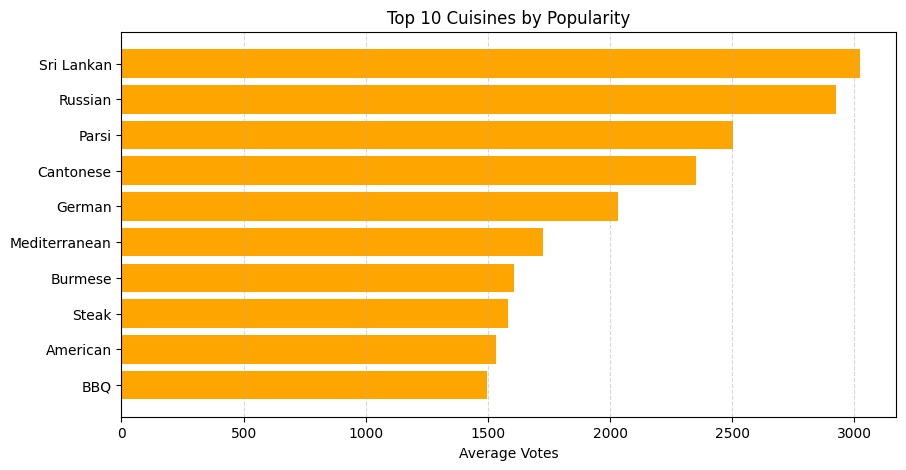

In [22]:
import matplotlib.pyplot as plt

# Top 10 Cuisines by Rating
plt.figure(figsize=(10, 5))
plt.barh(top_cuisines_by_rating['cuisine'], top_cuisines_by_rating['Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 10 Cuisines by Rating')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Top 10 Cuisines by Popularity (Votes)
plt.figure(figsize=(10, 5))
plt.barh(top_cuisines_by_votes['cuisine'], top_cuisines_by_votes['votes'], color='orange')
plt.xlabel('Average Votes')
plt.title('Top 10 Cuisines by Popularity')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
